# Entwurf PID-Regler für P-Tn-Strecke im Grundregelkreis

Verwendung der Standardregelstrecke als Beispiel für einen Kompensationsreglerentwurf

Zunächst Python-Pakete laden

In [1]:
import numpy as np
from  control.matlab import *
import matplotlib.pyplot as plt

Eingabe der Streckenparameter und Berechnung der Zeitkonstanten


In [2]:
b0 = 1.
a0 = 1. ; a1 = 10.; a2 = 31. ; a3 = 30. 
num  = np.array([b0])
den  = np.array([a3, a2, a1, a0])
strecke = tf(num,den)

print('Zeitkonstanten = ',-1/pole(strecke))

Zeitkonstanten =  [2.-0.j 3.-0.j 5.-0.j]


Entwurf gemäß Formel Tn = T1 + T2, Tv = T1*T2/Tn und Vorgabe der Dämpfung

In [3]:
kr =2.0; tn = 8.0
tv = 1.875 ; t1 = tv/10.0

Berechnung Regelkreis und Stellgrößenkreis

In [4]:
regler = tf([kr*(tv+t1)*tn, kr*(tn+t1), kr],[tn*t1, tn, 0])
regelkreis = feedback(regler*strecke,1)
x, t = step(regelkreis)

stell = feedback(regler, strecke)
y, t = step(stell)

Plot Sprungantwort Regel- und Stellgröße
vorher mit magischer Funktion die Ausgabe als "inline" vorbereiten

Text(0.5, 1.0, 'Entwurf gemäß Kompensation')

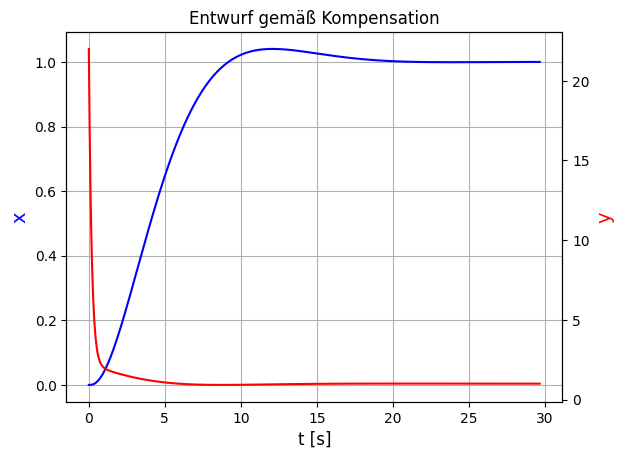

In [5]:
%matplotlib inline
fig, ax1 = plt.subplots()

ax1.plot(t, x, "b") 
ax1.set_ylabel('x', fontsize=14, color="blue") 
plt.grid()
ax2 = ax1.twinx() 
ax2.plot(t, y, "r") 
ax2.set_ylabel('y', fontsize=14,color="red") 
ax1.set_xlabel('t [s]', fontsize=12) 
plt.title('Entwurf gemäß Kompensation')
